In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spd_data = pd.read_csv("./SPD_officer_involved_shooting_data.csv")
spd_data.head()

,FRB #,Incident Number,Date / Time,Blurred Address,Longitude,Latitude,City,State,Rank,Officer Gender,...,Subject Race,Subject DOB,Subject Age,Subject Weapon,Type of Weapon,Fatal,On-duty,Disposition,Officer Disciplined?,Summary
0,FRB 05-01,20050000118193,03/21/2005 06:28:00 PM,65XX BLOCK OF RAINIER AV S,-122.273741,47.543815,Seattle,WA,Officer,Male,...,Asian,1975-11-03T00:00:00.000,29,Yes,Knife,Yes,Yes,Missing,Missing,"On March 21st, 2005, at approximately 5:20 P.M..."
1,FRB 05-03,20050000174022,04/29/2005 03:30:00 AM,65XX BLOCK OF 1 AV S,-122.334513,47.544177,Seattle,WA,Officer,Male,...,White,1969-08-02T00:00:00.000,36,No,NaN,Yes,Yes,Justified,No,"On April 29th, 2005, at approximately 3:35 A.M..."
2,FRB 05-04,20050000256303,06/20/2005 11:30:00 AM,7XX BLOCK OF STEWART ST,-122.335725,47.614620,Seattle,WA,Officer,Male,...,White,1952-11-15T00:00:00.000,53,Yes,"Grenade, backpack reported to have explosives",Yes,Yes,Justified,No,"On June 20th, 2005, at approximately 11:30 A.M..."
3,FRB 05-04,20050000256303,06/20/2005 12:30:00 PM,7XX BLOCK OF STEWART ST,-122.335725,47.614620,Seattle,WA,Officer,Male,...,White,1952-11-15T00:00:00.000,53,Yes,"Grenade, backpack reported to have explosives",Yes,Yes,Justified,No,"On June 20th, 2005, at approximately 11:30 A.M..."
4,FRB 05-05,20050000286240,07/08/2005 01:48:00 PM,16 AV / E UNION ST,-122.311474,47.612908,Seattle,WA,Officer,Male,...,Black or African American,1957-01-28T00:00:00.000,48,Yes,Screwdriver,No,Yes,Justified,No,"On July 8th, 2005, at approximately 1:45 P.M.,..."


In [81]:
spd_data.describe()

,Incident Number,Longitude,Latitude
count,1.560000e+02,156.000000,156.000000
mean,2.012705e+13,-122.195231,47.603107
std,4.056407e+10,1.505809,0.263320
min,2.005000e+13,-122.411392,44.414612
25%,2.009000e+13,-122.339003,47.595600
50%,2.014000e+13,-122.323604,47.618404
75%,2.016000e+13,-122.290325,47.676200
max,2.019000e+13,-103.514147,47.729558


In [11]:
{"Yes": 1, "No": 0}['Yes']

1

In [21]:
spd_weapon_fatal = spd_data[['Subject Weapon', 'Fatal']]
spd_weapon_fatal = spd_weapon_fatal.replace('Yes', 1)
spd_weapon_fatal = spd_weapon_fatal.replace('No', 0)
spd_weapon_fatal

,Subject Weapon,Fatal
0,1,1
1,0,1
2,1,1
3,1,1
4,1,0
...,...,...
151,1,0
152,1,1
153,1,1
154,1,0


In [37]:
spd_weapon_fatal.query("`Subject Weapon` == 1 & Fatal == 1")

,Subject Weapon,Fatal
0,1,1
2,1,1
3,1,1
13,1,1
14,1,1
...,...,...
144,1,1
145,1,1
146,1,1
152,1,1


In [44]:
print("Subject weapon and fatal", spd_weapon_fatal.query("`Subject Weapon` == 1 & Fatal == 1").count()[1])
print("Subject weapon and NOT fatal", spd_weapon_fatal.query("`Subject Weapon` == 1 & Fatal == 0").count()[1])
print("No Subject weapon and fatal", spd_weapon_fatal.query("`Subject Weapon` == 0 & Fatal == 1").count()[1])
print("No Subject weapon and not fatal", spd_weapon_fatal.query("`Subject Weapon` == 0 & Fatal == 0").count()[1])

Subject weapon and fatal 76
Subject weapon and NOT fatal 55
No Subject weapon and fatal 3
No Subject weapon and not fatal 22


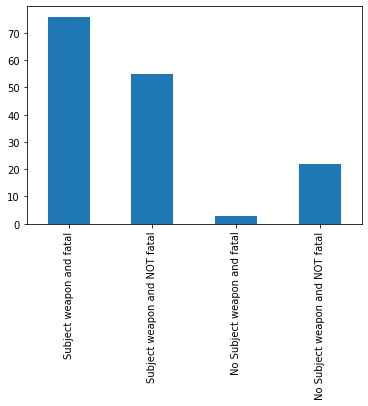

In [54]:
spd_weapon_fatal_summary = pd.Series()
spd_weapon_fatal_summary["Subject weapon and fatal"] = spd_weapon_fatal.query("`Subject Weapon` == 1 & Fatal == 1").count()[1]
spd_weapon_fatal_summary["Subject weapon and NOT fatal"] = spd_weapon_fatal.query("`Subject Weapon` == 1 & Fatal == 0").count()[1]
spd_weapon_fatal_summary["No Subject weapon and fatal"] = spd_weapon_fatal.query("`Subject Weapon` == 0 & Fatal == 1").count()[1]
spd_weapon_fatal_summary["No Subject weapon and NOT fatal"] = spd_weapon_fatal.query("`Subject Weapon` == 0 & Fatal == 0").count()[1]
spd_weapon_fatal_summary.plot(kind = 'bar')

In [75]:
spd_weapon = spd_data['Type of Weapon'].value_counts()
spd_weapon

Handgun                                          44
Knife                                            22
Gun                                              16
Vehicle                                           8
Multiple Types                                    6
Multiple Firearms                                 5
Rifle                                             4
Metal Bar                                         3
Shotgun                                           2
Broken bottle                                     2
6 shot .357 revolver                              2
Grenade, backpack reported to have explosives     2
Rifle w/ bayonet                                  2
.22 caliber pistol                                2
Colt Revolver                                     2
Screwdriver                                       1
Board                                             1
9mm semi-automatic                                1
.357 revolver                                     1
Mac-10, 9 mm

In [70]:
spd_weapon.index

Index(['Handgun', 'Knife', 'Gun', 'Vehicle', 'Multiple Types',
       'Multiple Firearms', 'Rifle', 'Metal Bar', 'Shotgun', 'Broken bottle',
       '6 shot .357 revolver', 'Grenade, backpack reported to have explosives',
       'Rifle w/ bayonet', '.22 caliber pistol', 'Colt Revolver',
       'Screwdriver', 'Board', '9mm semi-automatic', '.357 revolver',
       'Mac-10, 9 mm machine pistol', 'Air soft rifle',
       'Semil automatic .38 caliber handgun'],
      dtype='object')

In [71]:
spd_weapon.to_list()

[44, 22, 16, 8, 6, 5, 4, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]

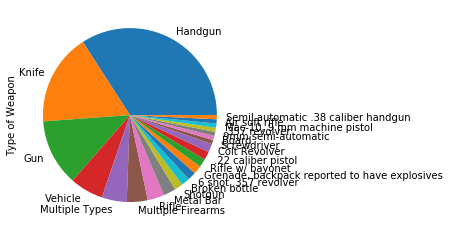

In [74]:
spd_weapon.plot.pie()

In [90]:
spd_data_comply = spd_data
spd_data_comply['Did Not Comply'] = spd_data['Summary'].str.contains("comply").astype('int')
spd_data_comply.head()

,FRB #,Incident Number,Date / Time,Blurred Address,Longitude,Latitude,City,State,Rank,Officer Gender,...,Subject DOB,Subject Age,Subject Weapon,Type of Weapon,Fatal,On-duty,Disposition,Officer Disciplined?,Summary,Did Not Comply
0,FRB 05-01,20050000118193,03/21/2005 06:28:00 PM,65XX BLOCK OF RAINIER AV S,-122.273741,47.543815,Seattle,WA,Officer,Male,...,1975-11-03T00:00:00.000,29,Yes,Knife,Yes,Yes,Missing,Missing,"On March 21st, 2005, at approximately 5:20 P.M...",0
1,FRB 05-03,20050000174022,04/29/2005 03:30:00 AM,65XX BLOCK OF 1 AV S,-122.334513,47.544177,Seattle,WA,Officer,Male,...,1969-08-02T00:00:00.000,36,No,NaN,Yes,Yes,Justified,No,"On April 29th, 2005, at approximately 3:35 A.M...",0
2,FRB 05-04,20050000256303,06/20/2005 11:30:00 AM,7XX BLOCK OF STEWART ST,-122.335725,47.614620,Seattle,WA,Officer,Male,...,1952-11-15T00:00:00.000,53,Yes,"Grenade, backpack reported to have explosives",Yes,Yes,Justified,No,"On June 20th, 2005, at approximately 11:30 A.M...",0
3,FRB 05-04,20050000256303,06/20/2005 12:30:00 PM,7XX BLOCK OF STEWART ST,-122.335725,47.614620,Seattle,WA,Officer,Male,...,1952-11-15T00:00:00.000,53,Yes,"Grenade, backpack reported to have explosives",Yes,Yes,Justified,No,"On June 20th, 2005, at approximately 11:30 A.M...",0
4,FRB 05-05,20050000286240,07/08/2005 01:48:00 PM,16 AV / E UNION ST,-122.311474,47.612908,Seattle,WA,Officer,Male,...,1957-01-28T00:00:00.000,48,Yes,Screwdriver,No,Yes,Justified,No,"On July 8th, 2005, at approximately 1:45 P.M.,...",0


In [94]:
spd_data_comply.query("`Fatal` == 'Yes'") 

,FRB #,Incident Number,Date / Time,Blurred Address,Longitude,Latitude,City,State,Rank,Officer Gender,...,Subject DOB,Subject Age,Subject Weapon,Type of Weapon,Fatal,On-duty,Disposition,Officer Disciplined?,Summary,Did Not Comply
0,FRB 05-01,20050000118193,03/21/2005 06:28:00 PM,65XX BLOCK OF RAINIER AV S,-122.273741,47.543815,Seattle,WA,Officer,Male,...,1975-11-03T00:00:00.000,29,Yes,Knife,Yes,Yes,Missing,Missing,"On March 21st, 2005, at approximately 5:20 P.M...",0
1,FRB 05-03,20050000174022,04/29/2005 03:30:00 AM,65XX BLOCK OF 1 AV S,-122.334513,47.544177,Seattle,WA,Officer,Male,...,1969-08-02T00:00:00.000,36,No,NaN,Yes,Yes,Justified,No,"On April 29th, 2005, at approximately 3:35 A.M...",0
2,FRB 05-04,20050000256303,06/20/2005 11:30:00 AM,7XX BLOCK OF STEWART ST,-122.335725,47.614620,Seattle,WA,Officer,Male,...,1952-11-15T00:00:00.000,53,Yes,"Grenade, backpack reported to have explosives",Yes,Yes,Justified,No,"On June 20th, 2005, at approximately 11:30 A.M...",0
3,FRB 05-04,20050000256303,06/20/2005 12:30:00 PM,7XX BLOCK OF STEWART ST,-122.335725,47.614620,Seattle,WA,Officer,Male,...,1952-11-15T00:00:00.000,53,Yes,"Grenade, backpack reported to have explosives",Yes,Yes,Justified,No,"On June 20th, 2005, at approximately 11:30 A.M...",0
13,FRB 06-05,20060000165112,04/25/2006 08:17:00 PM,BROADWAY E / E JOHN ST,-122.320873,47.619908,Seattle,WA,Officer,Male,...,1988-03-08T00:00:00.000,18,Yes,Colt Revolver,Yes,Yes,Justified,No,"On April 25th, 2006, at approximately 8:20 P.M...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,NaN,20180000486972,12/31/2018 05:01:00 PM,N 96 ST / AURORA AV N,-122.344620,47.698530,Seattle,WA,POLICE OFFICER,Male,...,1982-10-09T00:00:00.000,36,Yes,Handgun,Yes,Yes,Within Policy,No,"On the 31st of December 2018, at approximately...",0
145,NaN,20190000048393,02/07/2019 03:22:00 AM,105XX BLOCK MIDVALE AV N,-122.343340,47.705960,Seattle,WA,POLICE OFFICER,Male,...,1900-01-01T00:00:00.000,117,Yes,Knife,Yes,Yes,Within Policy,No,"On the 7th of February 2019, at 3:22 A.M., the...",0
146,NaN,20190000048393,02/07/2019 03:22:00 AM,105XX BLOCK MIDVALE AV N,-122.343340,47.705960,Seattle,WA,POLICE OFFICER,Male,...,1900-01-01T00:00:00.000,117,Yes,Knife,Yes,Yes,Within Policy,No,"On the 7th of February 2019, at 3:22 A.M., the...",0
152,NaN,20190000165328,05/08/2019 07:24:00 PM,600 BLOCK 3 AV W,-122.360624,47.625198,Seattle,WA,POLICE OFFICER,Male,...,1900-01-01T00:00:00.000,118,Yes,Knife,Yes,Yes,Within Policy,No,"On the 8th of May 2019, at approximately 7:15 ...",1


In [100]:
spd_data.shape

(156, 26)

In [103]:
spd_data_comply.query("`Did Not Comply` == 1 & Fatal == 'Yes'").shape[0] / spd_data_comply.query("`Did Not Comply` == 1").shape[0]

0.7619047619047619

In [105]:
spd_data_comply.query("`Did Not Comply` == 1 & Fatal == 'Yes'").shape[0] / spd_data_comply.query("Fatal == 'Yes'").shape[0]

0.20253164556962025

In [128]:
spd_data_comply.query("`Did Not Comply` == 1").shape[0] / spd_data_comply.shape[0]

0.1346153846153846

In [106]:
spd_data.query("`Subject Weapon` == 'Yes' & Fatal == 'Yes'").shape[0] / spd_data.query("Fatal == 'Yes'").shape[0]

0.9620253164556962

In [127]:
for e in spd_data_comply.query("`Did Not Comply` == 0 & Fatal == 'Yes'").sort_values('Date / Time', ascending = False)['Summary'][:10].to_list():
    print(e, '\n------------------------------------------------\n')

On the 31st of December 2018, at approximately 5:00 P.M., two Seattle Police Officers in a two-person unit (a single car occupied by two officers, dispatched as a single resource) initiated a traffic stop in the 9500 block of Aurora Avenue North. The vehicle was marked with emergency lights activated to signal the stop. The stop was conducted based on an observed illegal lane change. Additionally, a check of the Washington State Department of Licensing (DOL) system, indicated the registered owner of the vehicle had a “suspended / revoked” license. The driver of the vehicle complied with the traffic stop, pulling into a parking lot. As the vehicle came to a stop, the male driver attempted to exit the vehicle. Officers instructed the subject to remain in the vehicle and he complied. On initial contact with the occupants of the vehicle (a male driver and female passenger), officers determined the driver was not the registered owner the of vehicle and was not carrying identification but pr

In [117]:
spd_data.query("`Subject Weapon` == 'No' & Fatal == 'Yes'")['Summary'].to_list()

['On April 29th, 2005, at approximately 3:35 A.M., an on duty Patrol Officer responded to assist in locating a possibly suicidal person, in the area of the 1st Avenue South Bridge. The subject was located in steep terrain and bushes after having jumped from the bridge. Officers approached the subject, and while attempting to take the subject into custody, the subject made attempts to grab both officers’ firearms. An officer fired two rounds, striking the subject. \r\n\r\nThe subject was transported by medics to Harborview Medical Center where he died.  \r\n\r\nThe subject was not armed by attempted to take or control the firearms of both officers.',
 'On December 1st, 2009, at approximately 2:30 A.M., a Seattle Police Patrol Officer was investigating a disabled vehicle in the 4400 block of South Kenyon St. The officer had previously observed a male wearing a hooded sweatshirt walking away from the vehicle, with his hands in his pockets. As the officer was reporting the suspicious vehic

In [130]:
from collections import Counter
spd_data_double = Counter(" ".join(spd_data["Summary"]).split()).most_common(102)
spd_data_double

[('the', 3187),
 ('and', 1176),
 ('to', 1007),
 ('subject', 976),
 ('a', 959),
 ('of', 824),
 ('The', 745),
 ('was', 593),
 ('in', 571),
 ('officers', 484),
 ('at', 451),
 ('vehicle', 303),
 ('officer', 279),
 ('with', 268),
 ('on', 257),
 ('Seattle', 241),
 ('his', 240),
 ('Officers', 236),
 ('from', 236),
 ('were', 229),
 ('Police', 215),
 ('approximately', 173),
 ('fired', 166),
 ('On', 161),
 ('by', 159),
 ('an', 155),
 ('subject.', 148),
 ('into', 145),
 ('responded', 139),
 ('he', 137),
 ('as', 134),
 ('block', 133),
 ('two', 129),
 ('one', 123),
 ('P.M.,', 119),
 ('attempted', 113),
 ('At', 106),
 ('Avenue', 103),
 ('where', 103),
 ('several', 95),
 ('striking', 94),
 ('for', 93),
 ('observed', 88),
 ('who', 88),
 ('subjects', 87),
 ('located', 85),
 ('continued', 80),
 ('their', 80),
 ('male', 77),
 ('contact', 76),
 ('scene.', 75),
 ('approached', 74),
 ('not', 74),
 ('vehicle.', 74),
 ('had', 74),
 ('Harborview', 72),
 ('Medical', 72),
 ('Center', 72),
 ('fled', 72),
 ('then'

In [132]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
spd_data.apply(lambda x: [item for item in x if item not in stop])

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Evelyn/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Evelyn\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
